# Lab - JetsonNanoSetup - PretrainedDeployment
## E6692 Spring 2022


## Part 2.1: Pretrained Model Deployment

In this part we deploy a pretrained model, FaceNet, for detecting faces and regressing facial keypoints.

In [1]:
# import packages
import os
import cv2
import numpy as np
from IPython.display import Video, display

from utils.pretrained_deployment import download_n_images
from utils.display import *
from facenet_pytorch import MTCNN

device = 'cuda'

# reload modules every 2 seconds to see changes in notebook
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

### FaceNet MTCNN

We will use the [Multi-task Cascaded Convolutional Network](https://medium.com/@iselagradilla94/multi-task-cascaded-convolutional-networks-mtcnn-for-face-detection-and-facial-landmark-alignment-7c21e8007923) (MTCNN) functionality provided by the **PyTorch [FaceNet](https://github.com/timesler/facenet-pytorch)** implementation.

#### Download Data

First, we need some images to do inference with.

In **utils/pretrained_deployment.py** we provide the function **download_n_images()** for downloading google images. Use **download_n_images()** to download images of faces for inference.

In [18]:
# TODO: download images with faces for inference using download_n_images().
# Suggested queries are 'faces', 'people', 'famous people', etc. 
# Be creative with your query to make grading more entertaining. 
# Use the variables defined below.

query = "friends"
num_images = 10

download_n_images(query, num_images)


Item no.: 1 --> Item name = friends
Evaluating...
Starting Download...
Image URL: https://cdn.vox-cdn.com/thumbor/WR2f-PO6_gC1qy0K6wY7KOUicgQ=/0x360:2592x1656/fit-in/1200x600/cdn.vox-cdn.com/uploads/chorus_asset/file/15002495/friendscast.0.0.1429818191.jpg
Completed Image ====> 1.friendscast.0.0.1429818191.jpg
Image URL: https://cdn.mos.cms.futurecdn.net/sWuaJgUngTiSkyuBSsB6w5.jpg
Completed Image ====> 2.swuajgungtiskyubssb6w5.jpg
Image URL: https://www.biography.com/.image/t_share/MTE5NTU2MzI1Mjg3MzY0MTA3/friends-cast-promo-finaljpg.jpg
Completed Image ====> 3.friends-cast-promo-finaljpg.jpg
Image URL: https://i.insider.com/60b1075bbee0fc0019d5a365?width=1200&format=jpeg
Completed Image ====> 4.60b1075bbee0fc0019d5a365.jpg
Image URL: https://hips.hearstapps.com/cosmouk.cdnds.net/16/27/1467801438-friends-different-today-whatsapp.jpg
Completed Image ====> 5.1467801438-friends-different-today-whatsapp.jpg
Image URL: https://images.tbs.com/tbs/w_1360/https%3A%2F%2Fi.cdn.tbs.com%2Fassets%

Now we need to examine the downloaded images and verify that they are suitable (they contain faces) for inference. Use the function **display_images()** in **utils/display.py** to display the first three images. 

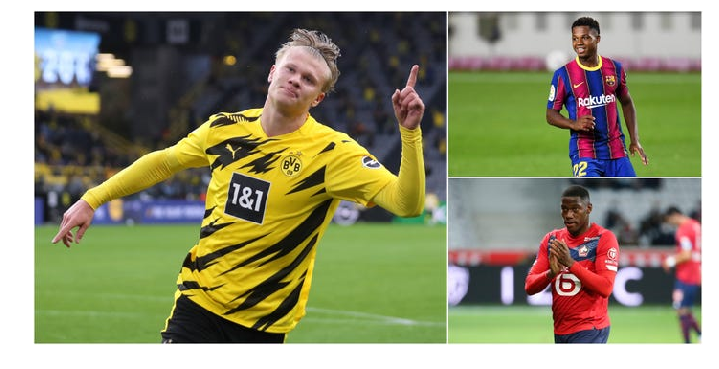

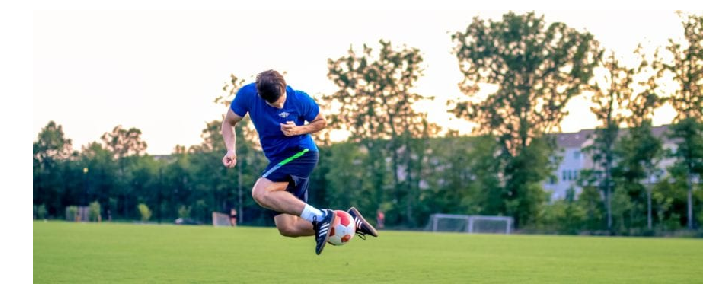

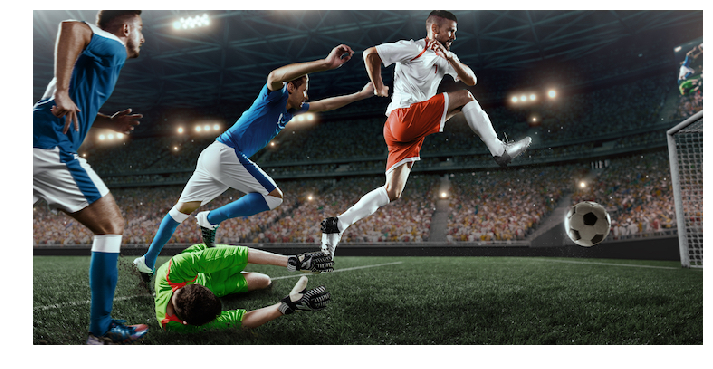

In [27]:
# TODO: Visualize the first 3 downloaded images using display_images()

display_images("soccer player", 3)

#### Comment on the images you downloaded. Are they suitable for inference? Are there any potential issues?

TODO:

They are not very good for inference, cause either there are too many faces or too much occulation to show a whole face.


## FaceNet Inference

Now initialize the MTCNN face detection model. By default, the MTCNN model outputs cropped areas of the input where it detects faces. Initialize **MTCNN** with `select_largest=False`, `post_process=False`, `device=device`, and `keep_all=True`.

Visit https://github.com/timesler/facenet-pytorch for help with syntax.

In [22]:
# TODO: initialize the MTCNN FaceNet detector with the configuration described above.
# TODO: print the model summary. In PyTorch this can be done with "print(model)"
# from torchsummary import summary
mtcnn = MTCNN(select_largest=False, post_process=False, device=device, keep_all=True)

In [3]:
print(mtcnn)

MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

TODO: Implement the function **display_faces()** in **utils/display.py**. 

torch.Size([3, 3, 160, 160])
6.5fb29de21c741f0019ac9f5e.jpg analyzed!
torch.Size([1, 3, 160, 160])
10.soccer-jumping-880x360.jpg analyzed!


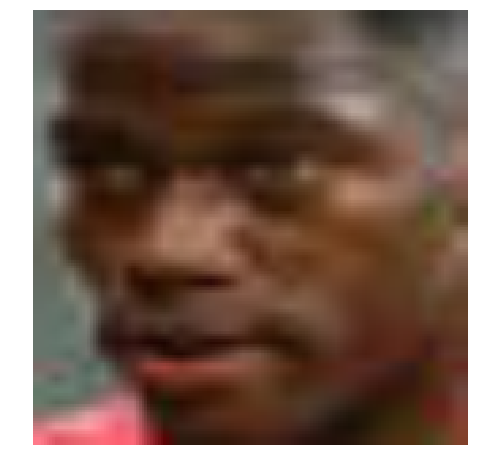

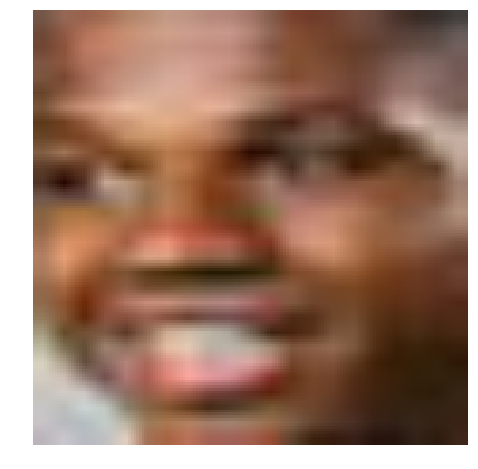

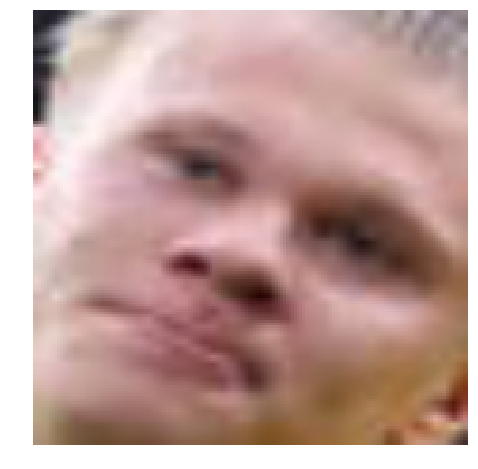

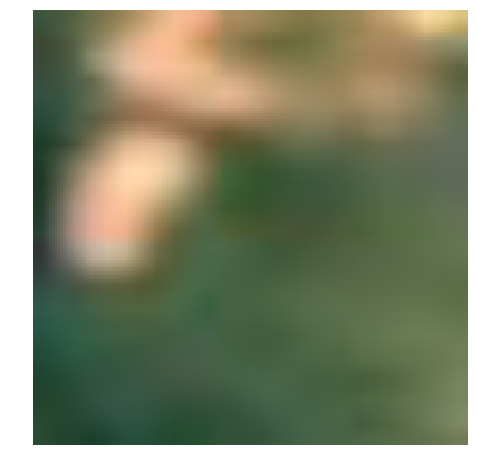

In [29]:
# TODO: use display_faces() to display the faces of the first three images

a = display_faces("soccer player", mtcnn, 2)


This model is called a Multi-task CNN because it detects faces **and** regresses keypoints (or landmarks) of the face including eye, nose, and mouth locations. Here we explore the keypoint regression functionality.

TODO: Implement the functions **draw_boxes_and_landmarks()** and **display_detection_and_keypoints()** in **utils/display.py**. The default forward pass of MTCNN returns cropped faces, but this implementation also has a `.detect()` method for returning face and keypoint locations in the image. Use `MTCNN.detect()` with `landmarks=True` to implement **display_detection_and_keypoints()**.

In [ ]:
# TODO: Use display_detection_and_keypoints() to display the first three images with 
#       faces and keypoints indicated. 

mtcnn.detect(landmarks=True)


### Comment on the accuracy of the face detection and keypoint regression. Where does the model perform well and where does it fail?

TODO: Your answer here

## FaceNet Video Inference

Run the cell below to view a clip from [the Princess Bride](https://youtu.be/dTRKCXC0JFg?t=3).

In [ ]:
video_path = os.path.join(DATA_PATH, 'PrincessBride.mp4') # define path to video
Video(video_path, width=960, height=540) # embed video in JupyterLab

Now finish the function **video_inference()** in **utils/display.py**. 

In [ ]:
# TODO: perform inference on the video above with the function detected_video_path()
# Perform inference on at least 30 frames. The whole video may take a long time.



Run the cell below to view the detected video.

In [ ]:
Video(detected_video_path, width=960, height=540, embed=True)

## Part 2.2: Pretrained Model Inference with Webcam


Now we will integrate FaceNet into the webcam stream. To use the webcam, you will need to mount the docker with the USB camera connected and the tag `--device /dev/video0` specified.

Verify the camera is accessible by running the cell below.

In [ ]:
!ls -ltrh /dev/video*

Finish the function **webcam_inference()** in **utils/display.py** to perform face detection and keypoint regression with the camera feed. 

In [ ]:
# TODO: use webcam_inference() to display FaceNet inference on the camera feed



### Insert a screenshot of the webcam inference with bounding box detection and keypoint regression of your face

TODO: insert screenshot here.

### Comment on the effectiveness of the video inference and keypoint regression. Is the video feed operating in real time? What can be done to improve the inference speed?

TODO: Your answer here.